(-0.5, 1599.5, 311.5, -0.5)

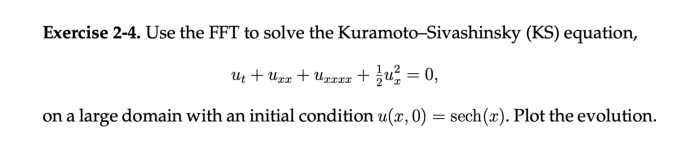

In [1]:
#Importing required Libraries
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('2.4.png'))
plt.imshow(A)
plt.axis('off')

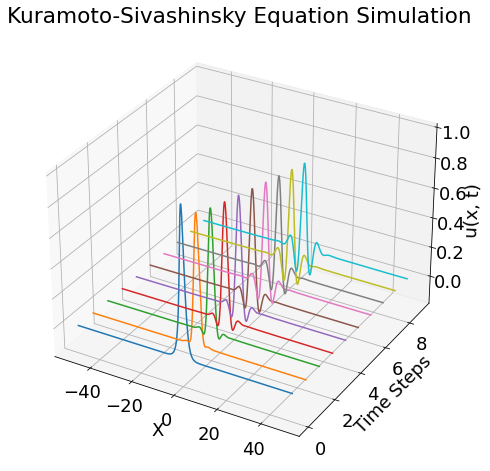

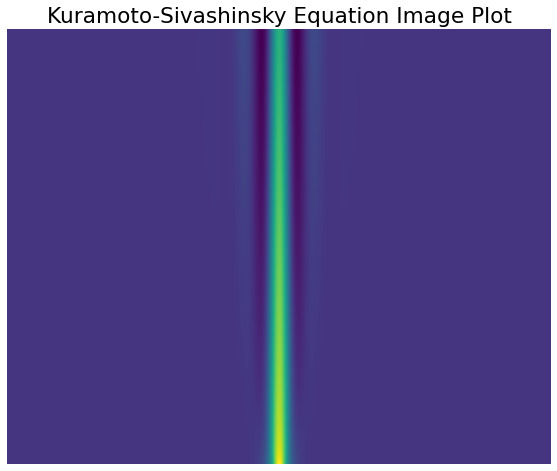

In [7]:
L = 100     # Length of domain
N = 1000   # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial Conditions
u0 = 1/np.cosh(x)
u0hat = np.fft.fft(u0)

u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

#Simulate in Fourier Frequency domain
dt = 0.025
t = np.arange(0,100*dt, dt)

def KS(uhat_ri,t,kappa):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -1/2*np.convolve((1j)*kappa*uhat, (1j)*kappa*uhat, mode='same')-np.power(kappa, 4)*uhat+np.power(kappa,2)*uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(KS,u0hat_ri,t,args=(kappa,))
uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real
# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10, :]
for j in range(u_plot.shape[0]):
    ys = j * np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[j, :])

ax.set_xlabel('X')
ax.set_ylabel('Time Steps')
ax.set_zlabel('u(x, t)')
plt.title('Kuramoto-Sivashinsky Equation Simulation')
plt.show()

# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.title('Kuramoto-Sivashinsky Equation Image Plot')
plt.show()